In [9]:
## libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
pd.set_option("display.max_columns", 100)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
#model libraries
from sklearn.linear_model import LogisticRegression  
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [3]:
data = pd.read_csv("data.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
506,0.98765,0.0,12.5,0,0.561,6.980,89.0,2.098,3,320,23.0,396.0,12.0,12.0
507,0.23456,0.0,12.5,0,0.561,6.980,76.0,2.654,3,320,23.0,343.0,25.0,32.0
508,0.44433,0.0,12.5,0,0.561,6.123,98.0,2.987,3,320,23.0,343.0,21.0,54.0
509,0.77763,0.0,12.7,0,0.561,6.222,34.0,2.543,3,329,23.0,343.0,76.0,67.0
510,0.65432,0.0,12.8,0,0.561,6.760,67.0,2.987,3,345,23.0,321.0,45.0,24.0


In [6]:
data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
393,8.64476,0.0,18.10,0,0.693,6.193,92.6,1.7912,24,666,20.2,396.90,15.17,13.8
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
224,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
213,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,4,277,18.6,385.81,9.38,28.1
309,0.34940,0.0,9.90,0,0.544,5.972,76.7,3.1025,4,304,18.4,396.24,9.97,20.3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [8]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
data["CHAS"].value_counts()

0    476
1     35
Name: CHAS, dtype: int64

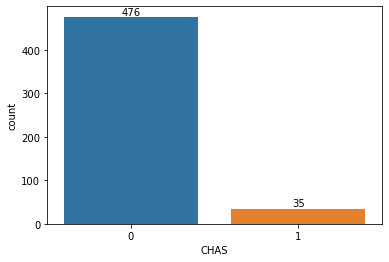

In [12]:
ax = sbn.countplot(x = data["CHAS"]);
ax.bar_label(ax.containers[0]);

In [15]:
data["CHAS"].unique()

array([0, 1], dtype=int64)

In [16]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.198451,0.405524,-0.054906,0.420524,-0.220363,0.350847,-0.377028,0.625964,0.583389,0.276695,-0.384356,0.405030,-0.380072
ZN,-0.198451,1.000000,-0.534106,-0.041333,-0.516256,0.307812,-0.567796,0.665185,-0.307146,-0.311531,-0.392844,0.175637,-0.390029,0.339767
INDUS,0.405524,-0.534106,1.000000,0.062332,0.763583,-0.392193,0.642817,-0.707886,0.591784,0.718764,0.379441,-0.356955,0.556707,-0.463269
CHAS,-0.054906,-0.041333,0.062332,1.000000,0.091023,0.089952,0.085814,-0.097541,-0.005343,-0.034244,-0.124415,0.048970,-0.057013,0.164782
NOX,0.420524,-0.516256,0.763583,0.091023,1.000000,-0.301778,0.729233,-0.768309,0.609343,0.666982,0.186073,-0.379936,0.540050,-0.411486
RM,-0.220363,0.307812,-0.392193,0.089952,-0.301778,1.000000,-0.237335,0.199853,-0.213078,-0.293969,-0.339755,0.127888,-0.553126,0.667695
AGE,0.350847,-0.567796,0.642817,0.085814,0.729233,-0.237335,1.000000,-0.745097,0.452229,0.503360,0.258251,-0.271925,0.529994,-0.368203
DIS,-0.377028,0.665185,-0.707886,-0.097541,-0.768309,0.199853,-0.745097,1.000000,-0.488474,-0.530379,-0.238155,0.290997,-0.467063,0.233469
RAD,0.625964,-0.307146,0.591784,-0.005343,0.609343,-0.213078,0.452229,-0.488474,1.000000,0.910211,0.438646,-0.442406,0.422389,-0.379016
TAX,0.583389,-0.311531,0.718764,-0.034244,0.666982,-0.293969,0.503360,-0.530379,0.910211,1.000000,0.440962,-0.440830,0.482088,-0.459274


In [17]:
data.corr()["CHAS"]

CRIM      -0.054906
ZN        -0.041333
INDUS      0.062332
CHAS       1.000000
NOX        0.091023
RM         0.089952
AGE        0.085814
DIS       -0.097541
RAD       -0.005343
TAX       -0.034244
PTRATIO   -0.124415
B          0.048970
LSTAT     -0.057013
MEDV       0.164782
Name: CHAS, dtype: float64

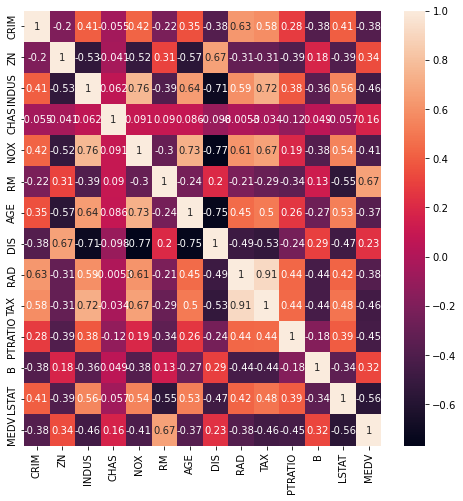

In [21]:
plt.figure(figsize = (8, 8))
sbn.heatmap(data.corr(), annot = True);

<AxesSubplot:xlabel='CHAS', ylabel='NOX'>

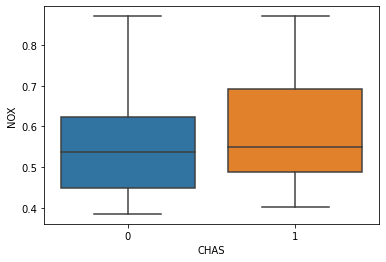

In [22]:
sbn.boxplot(x = data["CHAS"], y = data["NOX"])

In [24]:
data.corr()["CHAS"]

CRIM      -0.054906
ZN        -0.041333
INDUS      0.062332
CHAS       1.000000
NOX        0.091023
RM         0.089952
AGE        0.085814
DIS       -0.097541
RAD       -0.005343
TAX       -0.034244
PTRATIO   -0.124415
B          0.048970
LSTAT     -0.057013
MEDV       0.164782
Name: CHAS, dtype: float64

In [27]:
## missing values
imp_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")
data["RM"] = imp_mean.fit_transform(data[["RM"]])

In [29]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## once tum sutunları kulllanıcam sonra bazı sutunları atıp karşılaştıracağım.

In [30]:
y = data["CHAS"]
x = data.drop("CHAS", axis = 1)

In [50]:
def classification(x, y):
    lr = LogisticRegression()
    b = BernoulliNB()
    g = GaussianNB()
    dt = DecisionTreeClassifier(criterion = "gini")   # "gini", "entropy", "log_loss"
    rf = RandomForestClassifier()
    gbs = GradientBoostingClassifier()
    sv = SVC(kernel = "poly")  # 'linear', 'poly', 'rbf', 'sigmoid'
    
    models = [lr, b, g, dt, rf, gbs, sv]
    model_names = ["Logistic", "Bernoulli", "Gaussian", "Decision_Tree", "Random_Forest", 
                   "Gradient_Boost", "Support_Vector"]
    
    sonuc_df = pd.DataFrame(columns = ["Accuracy_Score"], index = model_names)
    accuracy = []
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    sc1 = MinMaxScaler()
    sc2 = StandardScaler()
    #x_train = sc1.fit_transform(x_train)
    #x_test = sc1.fit_transform(x_test)
    x_train = sc2.fit_transform(x_train)
    x_test = sc2.fit_transform(x_test)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy.append(accuracy_score(y_true, y_pred))
    
    sonuc_df["Accuracy_Score"] = accuracy
    return sonuc_df.sort_values("Accuracy_Score", ascending = False)
    

In [51]:
classification(x, y)   ## Sütunlar çıkarılmadan coğu model iyi sonuçlar verdi.

,Accuracy_Score
Decision_Tree,0.961165
Gradient_Boost,0.961165
Support_Vector,0.961165
Logistic,0.951456
Bernoulli,0.951456
Random_Forest,0.951456
Gaussian,0.766990


## Sütunlar çıkarıp bakıcam

In [52]:
data2 = data

In [53]:
data2.corr()["CHAS"]

CRIM      -0.054906
ZN        -0.041333
INDUS      0.062332
CHAS       1.000000
NOX        0.091023
RM         0.089919
AGE        0.085814
DIS       -0.097541
RAD       -0.005343
TAX       -0.034244
PTRATIO   -0.124415
B          0.048970
LSTAT     -0.057013
MEDV       0.164782
Name: CHAS, dtype: float64

In [54]:
data2 = data2.drop(["ZN", "RAD", "TAX", "B"], axis = 1)

In [55]:
y2 = data2["CHAS"]
x2 = data2.drop("CHAS", axis = 1)

In [56]:
def classification2(x, y):
    lr = LogisticRegression()
    b = BernoulliNB()
    g = GaussianNB()
    dt = DecisionTreeClassifier(criterion = "gini")   # "gini", "entropy", "log_loss"
    rf = RandomForestClassifier()
    gbs = GradientBoostingClassifier()
    sv = SVC(kernel = "poly")  # 'linear', 'poly', 'rbf', 'sigmoid'
    
    models = [lr, b, g, dt, rf, gbs, sv]
    model_names = ["Logistic", "Bernoulli", "Gaussian", "Decision_Tree", "Random_Forest", 
                   "Gradient_Boost", "Support_Vector"]
    
    sonuc_df = pd.DataFrame(columns = ["Accuracy_Score"], index = model_names)
    accuracy = []
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    sc1 = MinMaxScaler()
    sc2 = StandardScaler()
    #x_train = sc1.fit_transform(x_train)
    #x_test = sc1.fit_transform(x_test)
    x_train = sc2.fit_transform(x_train)
    x_test = sc2.fit_transform(x_test)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy.append(accuracy_score(y_true, y_pred))
    
    sonuc_df["Accuracy_Score"] = accuracy
    return sonuc_df.sort_values("Accuracy_Score", ascending = False)
    

In [57]:
classification2(x2, y2)  ## bazı sutunları cıkarmak sadece Gaussian() modelinin başarısın arttırdı. Yani genel olarak çok fazla bir değişiklik olamdı.

,Accuracy_Score
Decision_Tree,0.961165
Gradient_Boost,0.961165
Support_Vector,0.961165
Bernoulli,0.951456
Random_Forest,0.951456
Logistic,0.941748
Gaussian,0.922330
